In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 手动构造倾斜数据，变成二分类问题
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
import sys
sys.path.insert(0, '../PlayML')
from metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores))

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

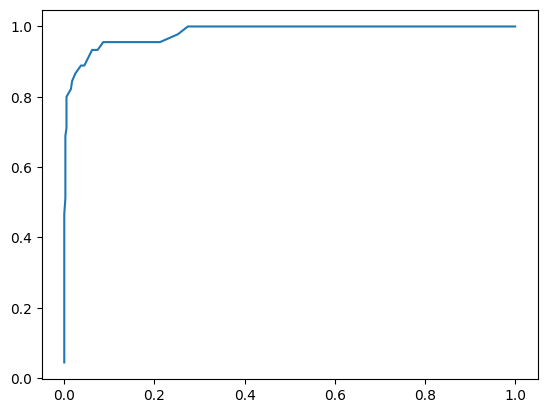

In [9]:
plt.plot(fprs, tprs)
plt.show()

In [10]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

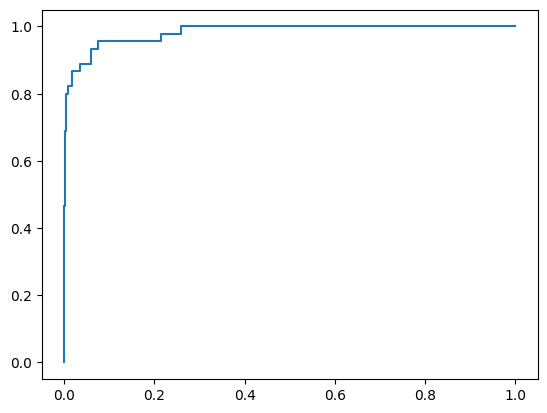

In [11]:
plt.plot(fprs, tprs)
plt.show()

In [14]:
# roc 曲线下方的阴影面积
from sklearn.metrics import roc_auc_score

# 通过该值选择阴影面积更大的模型
roc_auc_score(y_test, decision_scores)

0.9823868312757201